# Module 7 Practice 1 - Clustering liver disorder data
In this exercise you will perform clustering using the techniques discussed in the labs.  We're going to use an unlabeled dataset related to liver disorders for clustering in this practice.

The data is courtesy of BUPA Medical Research Ltd., donated by Richard S. Forsyth to the University of California Irvine: https://archive.ics.uci.edu/ml/datasets/Liver+Disorders


In [1]:
import pandas as pd

data = pd.read_csv('../resources/bupa.data', names=['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'dummy'])
display(data.head())

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


## KMeans Clustering
Perform KMeans clustering on the entire dataset, except the `dummy` column.  Specify two clusters.

In [2]:
# your code here

from sklearn.cluster import KMeans

subset=data.iloc[:, :-1]
display(subset.head())
model = KMeans(n_clusters=2).fit(subset)

classification = model.predict(subset)

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


### Predict a cluster assignment

Now, use the model to predict what cluster this data point would fit in:
`[90, 61, 42, 18, 100, 10]` where the data in in the same order as the first 6 columns of the dataset.

In [3]:
# your code here

print(model.predict([[90, 61, 42, 18, 100, 10]]))


[0]


### Output the cluster numbers and the mean, standard deviation, and count for each attribute in the cluster.
Since we did clustering on 6 variables, it isn't possible to visualize the clusters on a plot.  Instead, list the cluster numbers and the mean, standard deviation, and count for each attribute in the cluster.  Use the groupby method.

In [4]:
# your code here

subset['cluster'] = model.labels_

subset.groupby(by='cluster').agg(['mean', 'std', 'count'])

mcv                    alkphos                        sgpt  \
              mean       std count       mean        std count       mean   
cluster                                                                     
0        91.945946  4.521221    37  75.567568  15.512612    37  60.324324   
1        89.944805  4.397979   308  69.185065  18.563602   308  26.811688   

                               sgot                      gammagt             \
               std count       mean        std count        mean        std   
cluster                                                                       
0        35.504346    37  39.567568  15.532297    37  130.216216  51.152351   
1        12.568131   308  22.850649   7.425883   308   27.240260  16.699121   

                 drinks                  
        count      mean       std count  
cluster                                  
0          37  6.040541  4.534403    37  
1         308  3.144481  3.028271   308

### Compute the Calinski Harabasz score for the clustered data.

In [5]:
# your code here

from sklearn import metrics
print(metrics.calinski_harabaz_score(subset, model.labels_))

322.295844428536


## DBSCAN Clustering
Using the same data, perform a DBSCAN clustering algorithm.  Use a min sample size of 100, and an eps of 30

In [6]:
# your code here

from sklearn.cluster import DBSCAN

subset=data.iloc[:, :-1]

model = DBSCAN(eps=20, min_samples=5).fit(subset)


### Output the cluster numbers and the mean, standard deviation, and count for each attribute in the cluster.

In [7]:
# your code here

subset['cluster'] = model.labels_

subset.groupby(by='cluster').agg(['mean', 'std', 'count'])

mcv                    alkphos                        sgpt  \
              mean       std count       mean        std count       mean   
cluster                                                                     
-1       91.540000  4.527512    50  78.180000  19.462879    50  62.320000   
 0       89.944828  4.407102   290  68.344828  17.931195   290  24.824138   
 1       88.800000  4.207137     5  75.200000   3.563706     5  35.000000   

                               sgot                      gammagt             \
               std count       mean        std count        mean        std   
cluster                                                                       
-1       30.951206    50  40.640000  14.674370    50  101.700000  61.430648   
 0        9.052716   290  21.786207   5.471140   290   26.089655  16.020712   
 1        8.366600     5  30.400000   8.876936     5  111.400000   3.781534   

                 drinks                  
        count      mean       std count  
cluster                                  
-1         50  6.030000  4.569654    50  
 0        290  2.960345  2.781734   290  
 1          5  6.400000  5.639149     5

### Compute the Calinski Harabasz score for the clustered data.

In [8]:
# your code here

# we have to remove the unclustered data in the case of DBSCAN
cluster_mask = [True if x >= 0 else False for x in subset['cluster']]

clustered_data = subset[cluster_mask]

print(round(metrics.calinski_harabaz_score(clustered_data.iloc[:,:-1], clustered_data.iloc[:,-1:].values.ravel()), 3))

51.993


## Hierarchical clustering
Using the same data, perform hierarchical clustering.  Specify two clusters and use complete linkage.

In [9]:
# your code here

from sklearn.cluster import AgglomerativeClustering

subset=data.iloc[:, :-1]

model = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(subset)

### Output the cluster numbers and the mean, standard deviation, and count for each attribute in the cluster.

In [10]:


subset['cluster'] = model.labels_

subset.groupby(by='cluster').agg(['mean', 'std', 'count'])# your code here

mcv                    alkphos                        sgpt  \
             mean       std count       mean        std count       mean   
cluster                                                                    
0        90.15407  4.453463   344  69.898256  18.366645   344  30.406977   
1        92.00000       NaN     1  60.000000        NaN     1  30.000000   

                               sgot                      gammagt             \
               std count       mean        std count        mean        std   
cluster                                                                       
0        19.540719   344  24.636628  10.078349   344   37.531977  36.738365   
1              NaN     1  27.000000        NaN     1  297.000000        NaN   

                 drinks                  
        count      mean       std count  
cluster                                  
0         344  3.459302  3.341771   344  
1           1  2.000000       NaN     1

### Plot a dendrogram using the supplied method.

In [11]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

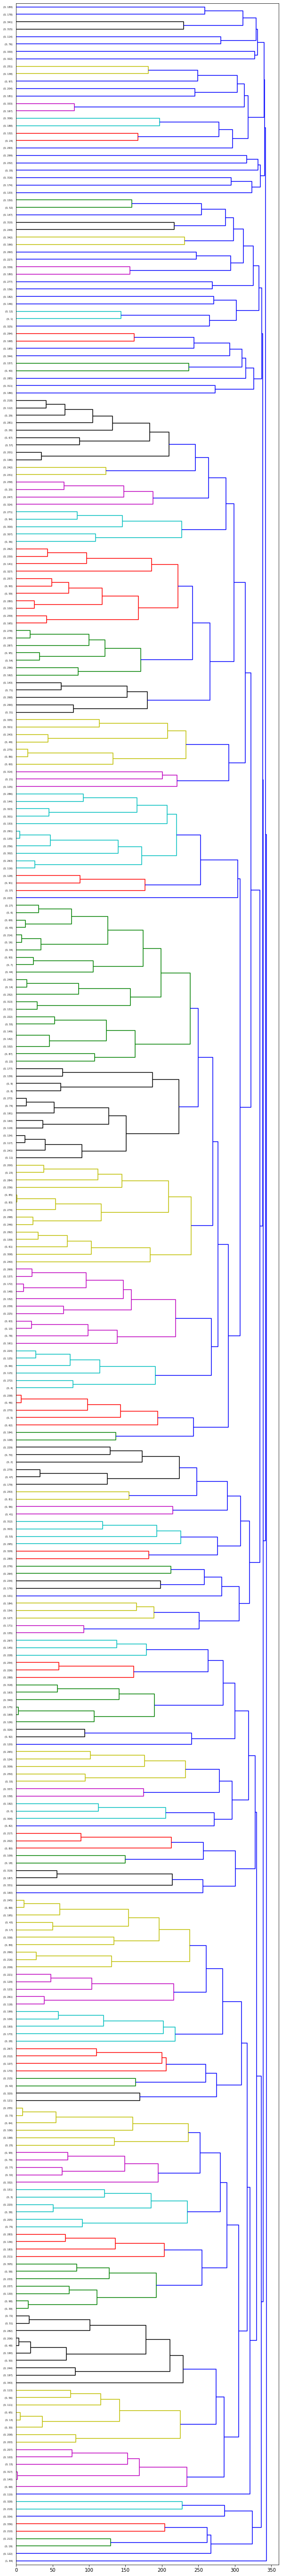

In [12]:
# your code here

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 100))
ax1 = fig.add_subplot(111)

# add the parameter labels=model.labels_ to replace the row index with the class label
plot_dendrogram(model, ax=ax1, orientation='right', labels=list(zip(model.labels_, subset.index)))

plt.show()

### Compute the Calinski Harabasz score for the clustered data.

In [13]:
# your code here

print(metrics.calinski_harabaz_score(subset, model.labels_))

30.54274015843291


## Questions:

1. Which clustering method performed the best, based on the Calinski-Harabasz score?
1. How many clusters did each method produce?
1. Which clustering method had the best distribution of samples across the clusters?


your answers here

1. K Means produced the highest score, therefore performed the best.
1. Each method produced 2 clusters.  DBSCAN has three groups, but the `-1` group is non clustered data.  This also impacts the computed Calinski-Harabasz since some points were dropped.
1. K Means had the least skewed cluster counts with (308,37).  When you discount the non clustered data, DBSCAN was second best at (290,5).  Hierarchical was the worst, with (344,1)